# Advanced Lane Lines - Color transformation and gradient threshold

In this notebook the following points from the Project 4 Advanced Lane Lines are implemented:
* Use color transforms, gradients, etc., to create a thresholded binary image. 

---
## Step 0: Import required libraries 

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

%matplotlib inline

## Step 1:  Udacity functions: sobel, magnitude and direction threshold

In [2]:
### Gradient thresholding ###

# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
# Note: calling your function with orient='x', thresh_min=5, thresh_max=100
# should produce output like the example image shown above this quiz.
def abs_sobel_thresh_x_or_y(img, orient='x', thresh_min=0, thresh_max=255):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    sobel_x_or_y = cv2.Sobel(gray, cv2.CV_64F, 
                             int(orient=='x'), int(orient=='y'))
    
    # 3) Take the absolute value of the derivative or gradient
    abs_sobel_x_or_y = np.absolute(sobel_x_or_y)
    
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    abs_sobel_x_or_y = np.uint8(255*abs_sobel_x_or_y/np.max(abs_sobel_x_or_y))
    
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    binary_output = np.zeros_like(abs_sobel_x_or_y) 
    binary_output[(abs_sobel_x_or_y>=thresh_min)&(abs_sobel_x_or_y<=thresh_max)] = 1
            
    # 6) Return this mask as your binary_output image
    return binary_output.astype(bool)
    
# Define a function that applies Sobel x and y, 
# then computes the magnitude of the gradient
# and applies a threshold
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # 2) Take the gradient in x and y separately
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    # 3) Calculate the magnitude 
    mag_sobel = np.sqrt(sobel_x**2+sobel_y**2)
    
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scaled_sobel = np.uint8(255*mag_sobel/np.max(mag_sobel))
    
    # 5) Create a binary mask where mag thresholds are met
    binary_output = np.zeros_like(scaled_sobel) 
    binary_output[(scaled_sobel>=mag_thresh[0])&(scaled_sobel<=mag_thresh[1])] = 1
    
    # 6) Return this mask as your binary_output image
    return binary_output.astype(bool)

# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # 2) Take the gradient in x and y separately
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    # 3) Take the absolute value of the x and y gradients
    abs_sobel_x = np.absolute(sobel_x)
    abs_sobel_y = np.absolute(sobel_y)
    
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    direction_of_gradient = np.arctan2(abs_sobel_y, abs_sobel_x)
    
    # 5) Create a binary mask where direction thresholds are met
    binary_output = np.zeros_like(abs_sobel_x) 
    binary_output[(direction_of_gradient>=thresh[0])&(direction_of_gradient<=thresh[1])] = 1
    
    # 6) Return this mask as your binary_output image
    return binary_output.astype(bool)


## Step 2: Apply sobel incl. madnitude and direction gradient

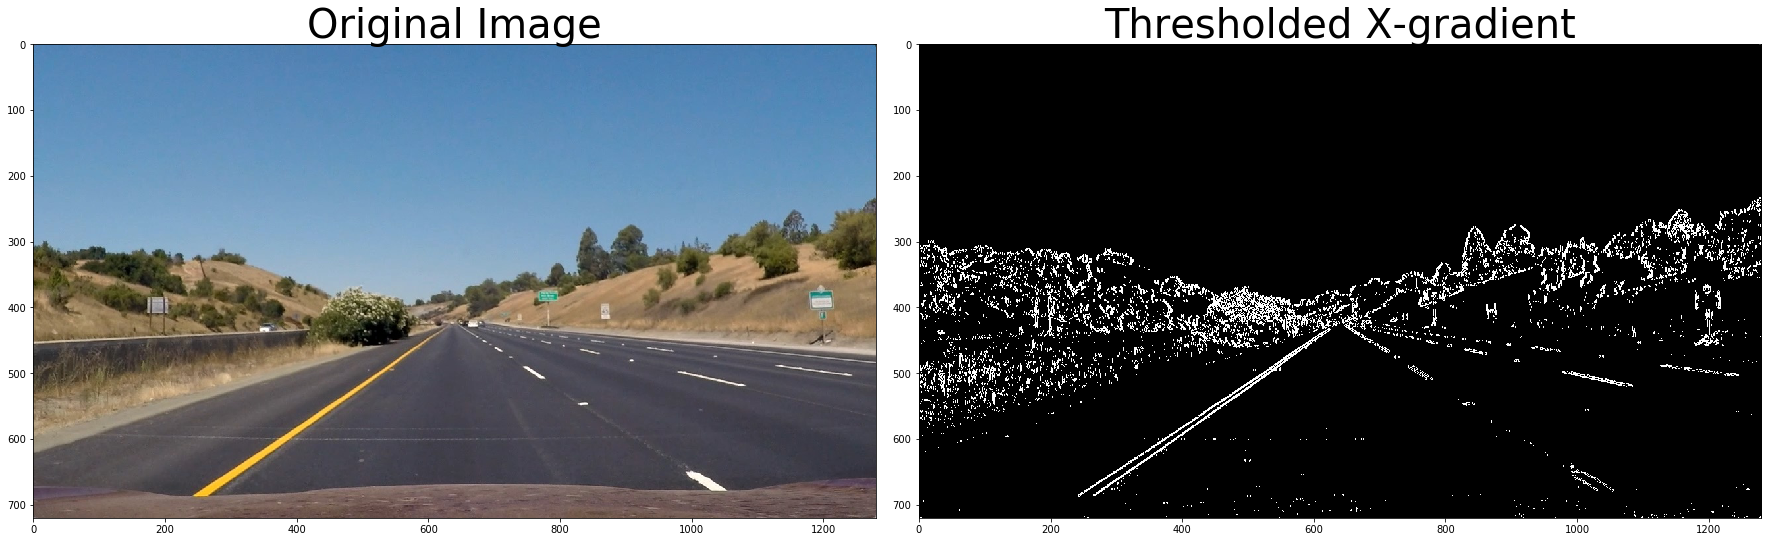

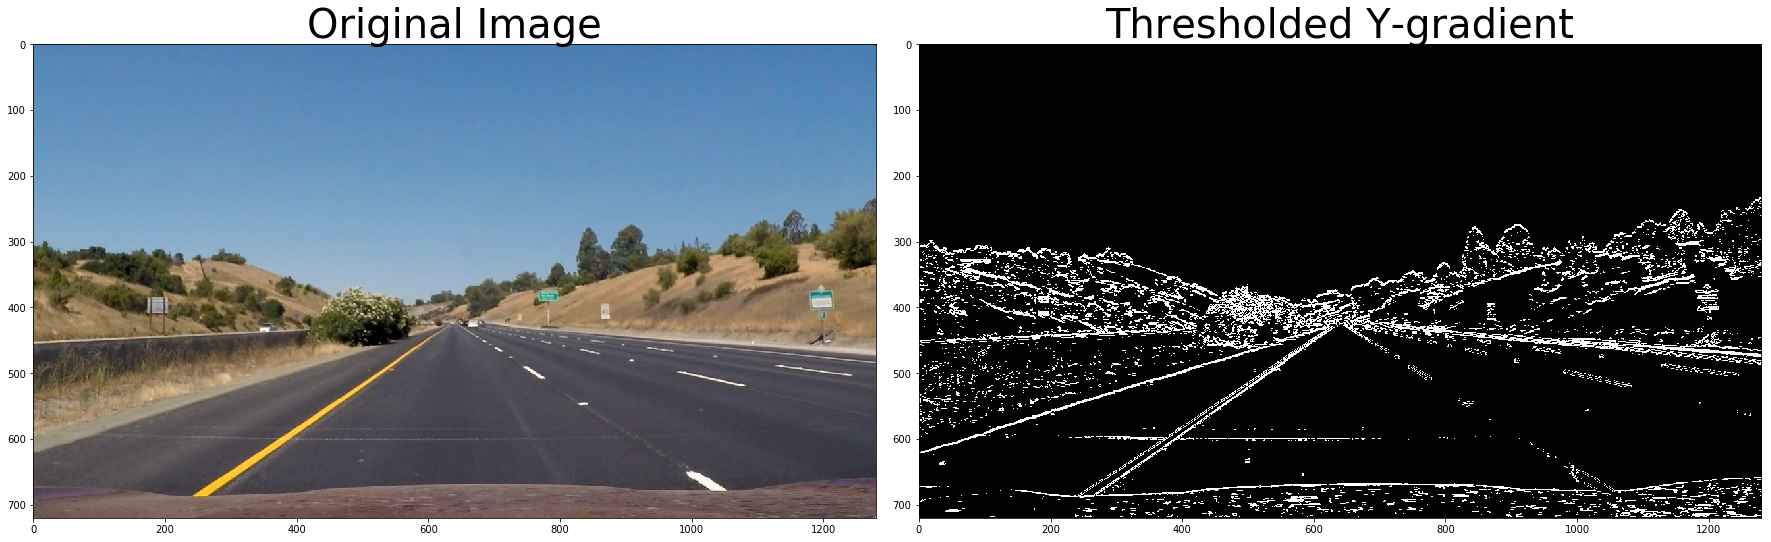

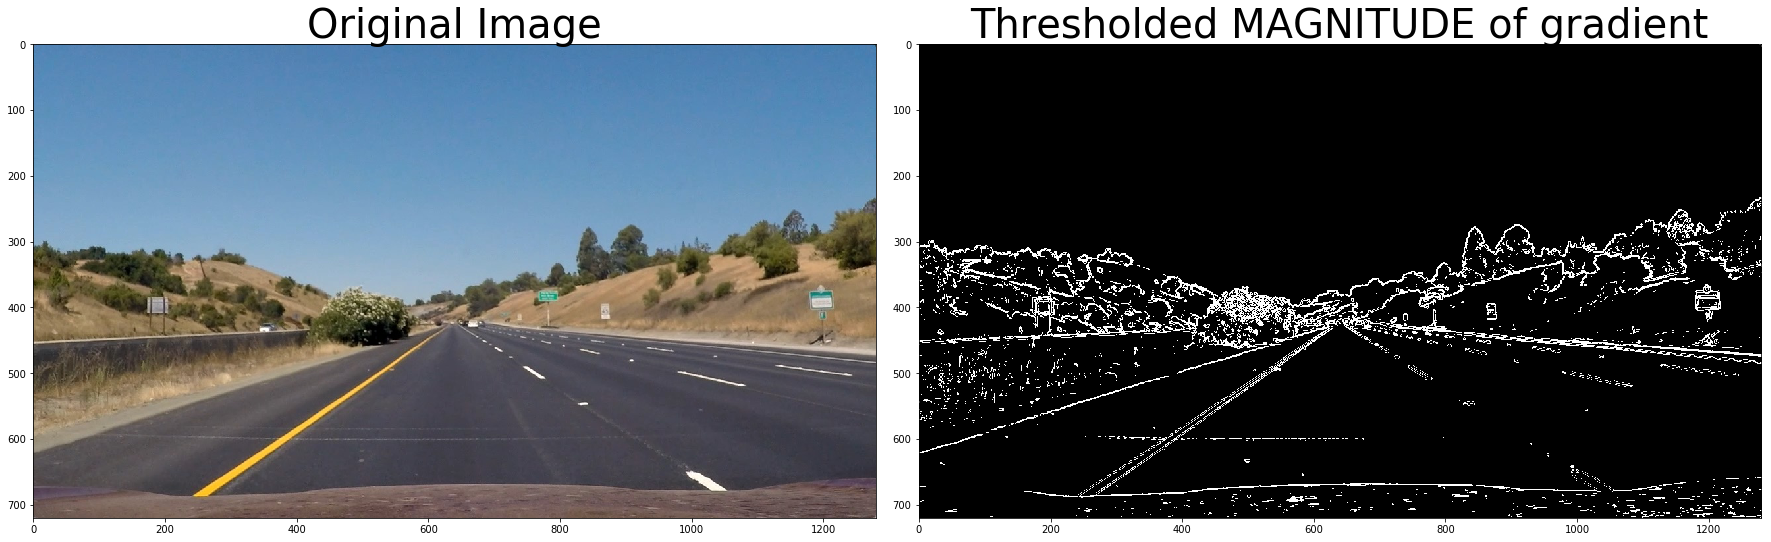

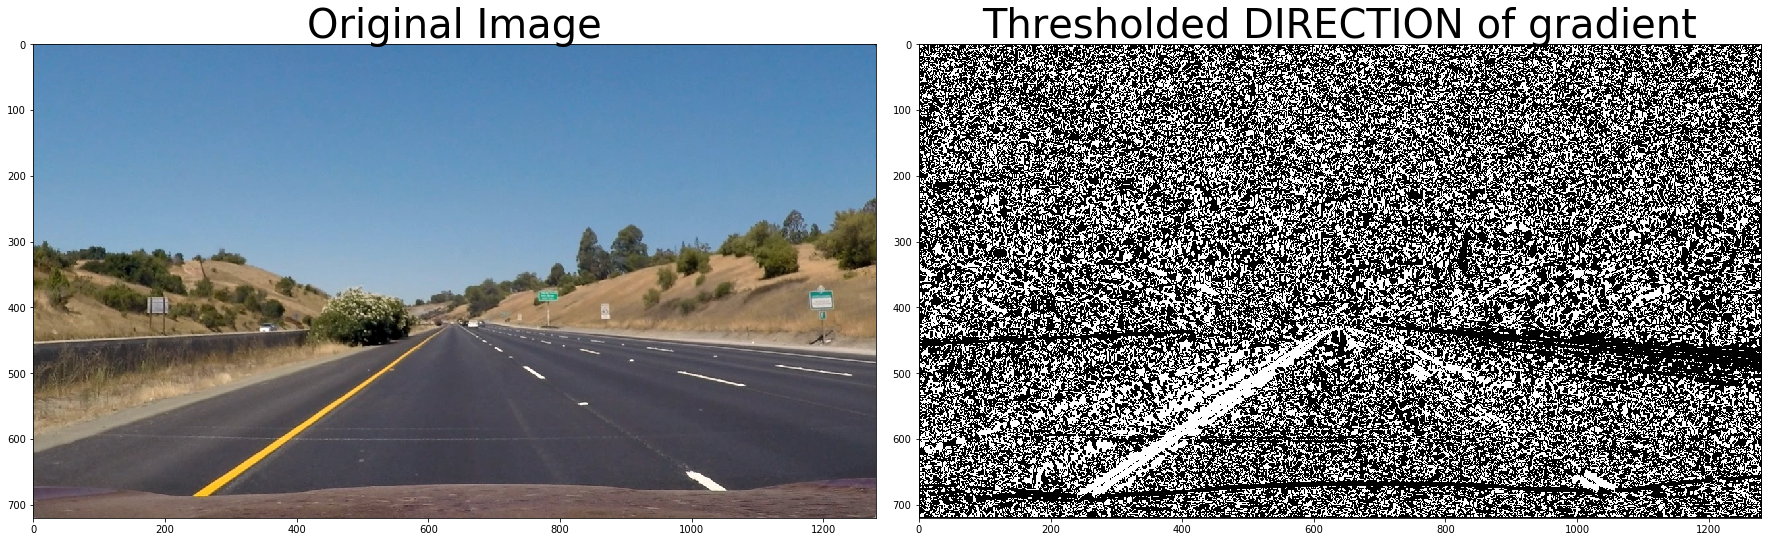

In [3]:
# Read in an image
image = cv2.cvtColor(cv2.imread('./test_images/straight_lines1.jpg'), cv2.COLOR_BGR2RGB)

## Thresholding on x- or y-gradients
gradX = abs_sobel_thresh_x_or_y(image, orient='x', thresh_min=20, thresh_max=100)
gradY = abs_sobel_thresh_x_or_y(image, orient='y', thresh_min=20, thresh_max=100)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)
ax2.imshow(gradX, cmap='gray')
ax2.set_title('Thresholded X-gradient', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)
ax2.imshow(gradY, cmap='gray')
ax2.set_title('Thresholded Y-gradient', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Thresholding on magnitude of gradient
magnitudeGradient = mag_thresh(image, sobel_kernel=3, mag_thresh=(30, 100))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)
ax2.imshow(magnitudeGradient, cmap='gray')
ax2.set_title('Thresholded MAGNITUDE of gradient', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


## Thresholding on direction of gradient
directionGradient = dir_threshold(image, sobel_kernel=15, thresh=(0.7, 1.3))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)
ax2.imshow(directionGradient, cmap='gray')
ax2.set_title('Thresholded DIRECTION of gradient', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
 

## Step 3: Combine gradients 

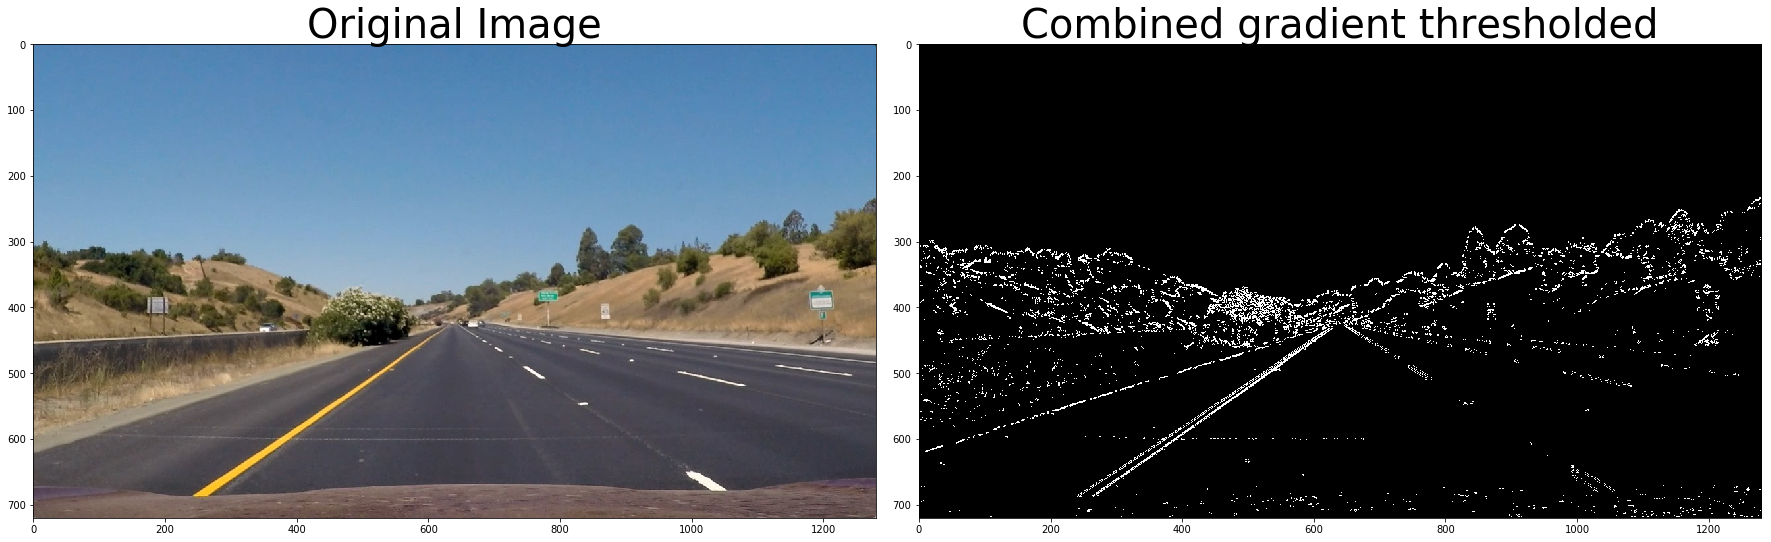

In [4]:
## Combine different thresholding strategies
combinedGradient = np.zeros_like(magnitudeGradient)
combinedGradient[((gradX == 1) & (gradY ==1)) | ((magnitudeGradient==1) & (directionGradient==1))] = 1

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)
ax2.imshow(combinedGradient, cmap='gray')
ax2.set_title('Combined gradient thresholded', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)  

## Step 4: Udacity Function: color thresholding (S-channel of HLS)
 

In [5]:
# Define a function that thresholds the S-channel of HLS
# Use exclusive lower bound (>) and inclusive upper (<=)
def hls_select(img, thresh=(0, 255)):
    # 1) Convert to HLS color space
    img_hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    
    # 2) Apply a threshold to the S channel
    s_channel = img_hls[:,:,2]
    binary_output = np.zeros_like(s_channel)
    binary_output[(s_channel>thresh[0]) & (s_channel<=thresh[1])] = 1
    
    # 3) Return a binary image of threshold result
    #binary_output = np.copy(img) # placeholder line
    return binary_output

In [6]:
# Helper function for later stages
def imageTransformation(image):
    
    # Gradient thresholding
    ## Thresholding on x- or y-gradients
    gradX = abs_sobel_thresh_x_or_y(image, orient='x', thresh_min=20, thresh_max=100)
    gradY = abs_sobel_thresh_x_or_y(image, orient='y', thresh_min=20, thresh_max=100)

    ## Thresholding on magnitude of gradient
    magnitudeGradient = mag_thresh(image, sobel_kernel=3, mag_thresh=(30, 100))

    ## Thresholding on direction of gradient
    directionGradient = dir_threshold(image, sobel_kernel=15, thresh=(0.7, 1.3))

    ## Combine different gradient thresholding strategies
    combinedGradient = np.zeros_like(magnitudeGradient)
    combinedGradient[((gradX==1) & (gradY==1)) | ((magnitudeGradient==1) & (directionGradient==1))] = 1

    ## Color thresholding
    HLSImageSThresholded = hls_select(image, thresh=(90, 255))

    # Combine the threshold and gradient thresholding
    combined2Image = np.zeros_like(gradX)
    combined2Image[(combinedGradient == 1) | (HLSImageSThresholded == 1)] = 1    

    return combined2Image

## Step 5: Apply color thresholding 


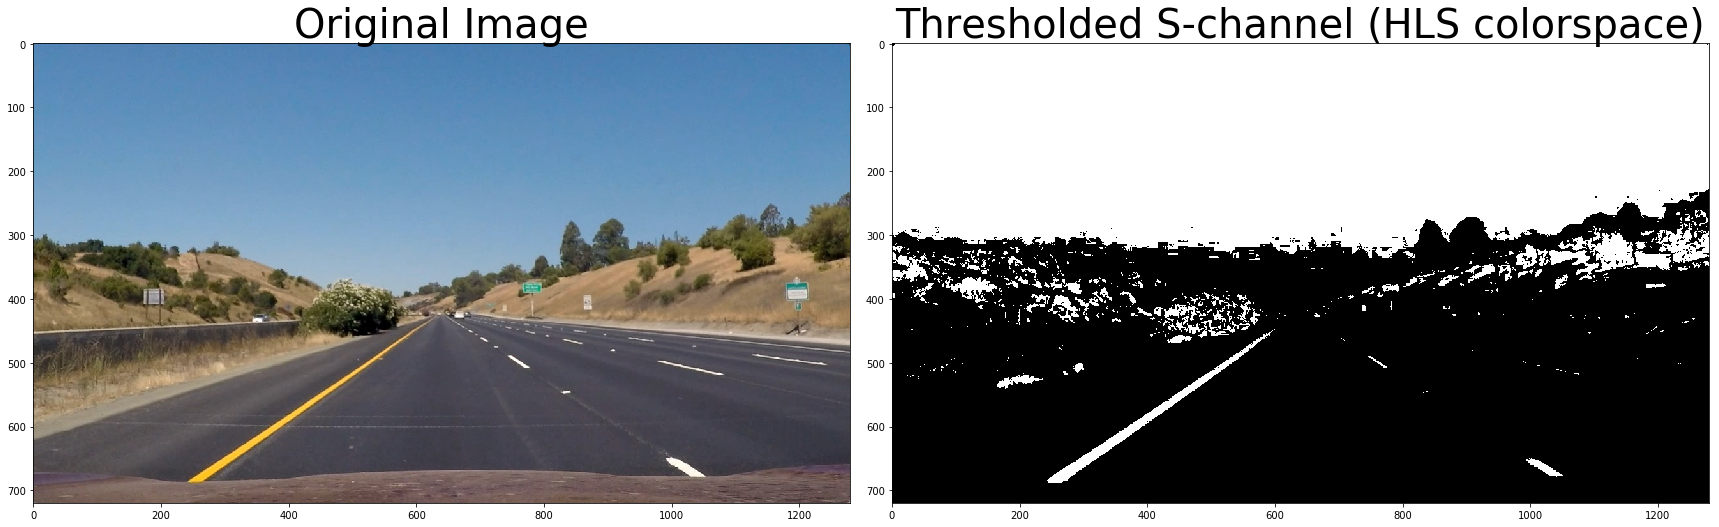

In [7]:
# Read in an image
image = cv2.cvtColor(cv2.imread('./test_images/straight_lines1.jpg'), cv2.COLOR_BGR2RGB)

## Color thresholding
HLSImageSThresholded = hls_select(image, thresh=(90, 255))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)
ax2.imshow(HLSImageSThresholded, cmap='gray')
ax2.set_title('Thresholded S-channel (HLS colorspace)', fontsize=40) 

## Step 6: Combined Color and Gradient thresholding 

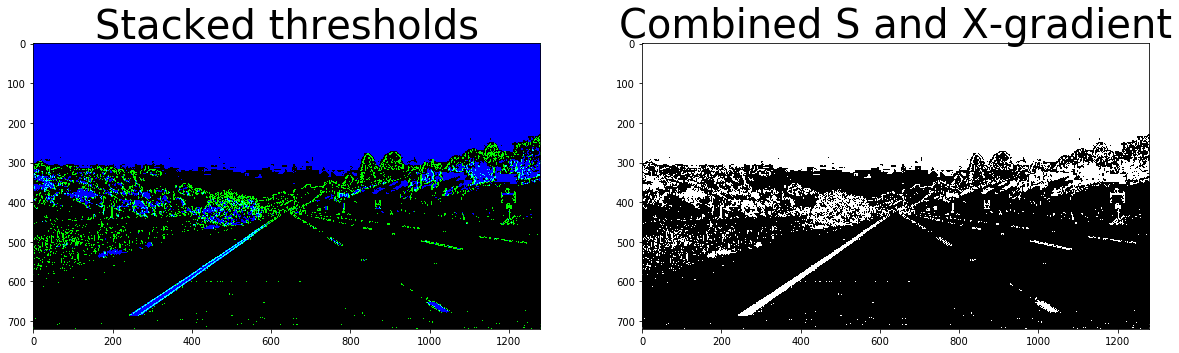

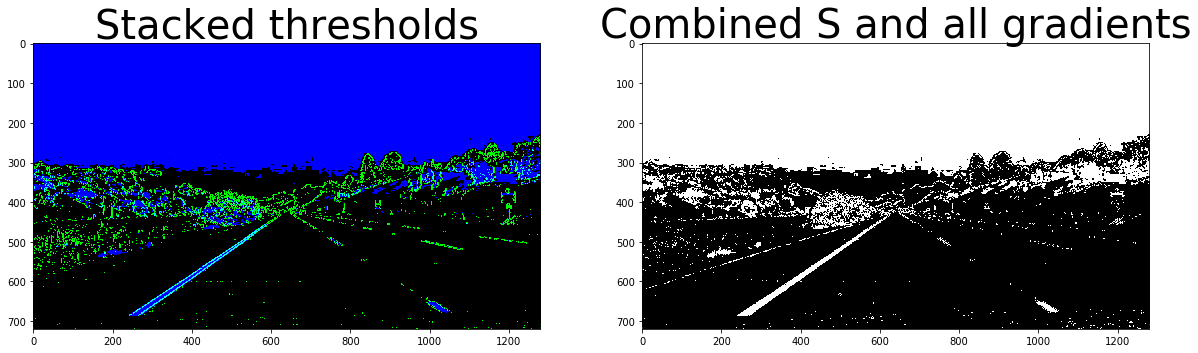

In [8]:
# Stack each channel to view their individual contributions in green and blue respectively
# This returns a stack of the two binary images, whose components you can see as different colors
colorImage = np.dstack(( np.zeros_like(gradX), gradX, HLSImageSThresholded)) * 255

# Combine the two binary thresholds
combinedImage = np.zeros_like(gradX)
combinedImage[(gradX == 1) | (HLSImageSThresholded == 1)] = 1

# Plotting thresholded images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Stacked thresholds', fontsize=40)
ax1.imshow(colorImage)

ax2.set_title('Combined S and X-gradient', fontsize=40)
ax2.imshow(combinedImage, cmap='gray')

# Combine the two binary thresholds
combined2Image = np.zeros_like(gradX)
combined2Image[(combinedGradient == 1) | (HLSImageSThresholded == 1)] = 1

# Plotting thresholded images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Stacked thresholds', fontsize=40)
ax1.imshow(colorImage)

ax2.set_title('Combined S and all gradients', fontsize=40)
ax2.imshow(combined2Image, cmap='gray')  